In [279]:
import tensorflow as tf
print("version tensorflow : "+tf.__version__)
from tensorflow import keras

version tensorflow : 2.3.0


In [280]:
import os
import random
import numpy as np
from tqdm import tqdm
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import random
import time
from sklearn.model_selection import train_test_split

In [281]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 160
IMG_HEIGHT = 160
IMG_CHANNEL = 22

In [282]:
def get_data(file_path):
    
    file = open(file_path, "r")

    allText = file.read()

    words = list(map(str, allText.split()))

    matrice_height = int(len(words) / 30)
    matrice = np.ones((matrice_height, 24))

    emplacement = 20
    iter1 = 0
    for i in range(emplacement, int(len(words) / 30) + emplacement):
        iter2 = 0
        for j in range(emplacement + 6, emplacement + 30):
            matrice[(iter1, iter2)] = words[j]
            iter2 += 1
        iter1 += 1
        emplacement += 30
    X_2 = np.delete(matrice, 1, 1)
    X_final = np.delete(X_2, 10, 1)
    
    file.close()
    
    return X_final

In [283]:
file_in_path = "datas/C_maps_in.txt"
file_out_path = "datas/C_maps_out.txt"

X = get_data(file_in_path)
y = get_data(file_out_path)

In [284]:
X.shape

(400198, 22)

In [285]:
X = X.reshape((1, 499, 802, 22))

In [286]:
X.shape

(1, 499, 802, 22)

In [287]:
y = y.reshape((1, 499, 802, 22))

In [288]:
y.shape

(1, 499, 802, 22)

In [289]:
X1 = X[:, :160, :160, :]
X2 = X[:, :160, 160:320, :]
X3 = X[:, :160, 320:480, :]
X4 = X[:, :160, 480:640, :]
X5 = X[:, :160, 640:800, :]

X6 = X[:, 160:320, :160, :]
X7 = X[:, 160:320, 160:320, :]
X8 = X[:, 160:320, 320:480, :]
X9 = X[:, 160:320, 480:640, :]
X10 = X[:, 160:320, 640:800, :]

X11 = X[:, 320:480, :160, :]
X12 = X[:, 320:480, 160:320, :]
X13 = X[:, 320:480, 320:480, :]
X14 = X[:, 320:480, 480:640, :]
X15 = X[:, 320:480, 640:800, :]

#===============================
y1 = y[:, :160, :160, :]
y2 = y[:, :160, 160:320, :]
y3 = y[:, :160, 320:480, :]
y4 = y[:, :160, 480:640, :]
y5 = y[:, :160, 640:800, :]

y6 = y[:, 160:320, :160, :]
y7 = y[:, 160:320, 160:320, :]
y8 = y[:, 160:320, 320:480, :]
y9 = y[:, 160:320, 480:640, :]
y10 = y[:, 160:320, 640:800, :]

y11 = y[:, 320:480, :160, :]
y12 = y[:, 320:480, 160:320, :]
y13 = y[:, 320:480, 320:480, :]
y14 = y[:, 320:480, 480:640, :]
y15 = y[:, 320:480, 640:800, :]

In [290]:
print(X1.shape)

(1, 160, 160, 22)


In [291]:
new_X = np.concatenate((X1, X2), axis=0)
new_Y = np.concatenate((y1, y2), axis=0)
new_X = np.concatenate((new_X, X3), axis=0)
new_Y = np.concatenate((new_Y, y3), axis=0)
new_X = np.concatenate((new_X, X4), axis=0)
new_Y = np.concatenate((new_Y, y4), axis=0)
new_X = np.concatenate((new_X, X5), axis=0)
new_Y = np.concatenate((new_Y, y5), axis=0)
new_X = np.concatenate((new_X, X6), axis=0)
new_Y = np.concatenate((new_Y, y6), axis=0)
new_X = np.concatenate((new_X, X7), axis=0)
new_Y = np.concatenate((new_Y, y7), axis=0)
new_X = np.concatenate((new_X, X8), axis=0)
new_Y = np.concatenate((new_Y, y8), axis=0)
new_X = np.concatenate((new_X, X9), axis=0)
new_Y = np.concatenate((new_Y, y9), axis=0)
new_X = np.concatenate((new_X, X10), axis=0)
new_Y = np.concatenate((new_Y, y10), axis=0)
new_X = np.concatenate((new_X, X11), axis=0)
new_Y = np.concatenate((new_Y, y11), axis=0)
new_X = np.concatenate((new_X, X12), axis=0)
new_Y = np.concatenate((new_Y, y12), axis=0)
new_X = np.concatenate((new_X, X13), axis=0)
new_Y = np.concatenate((new_Y, y13), axis=0)
new_X = np.concatenate((new_X, X14), axis=0)
new_Y = np.concatenate((new_Y, y14), axis=0)
new_X = np.concatenate((new_X, X15), axis=0)
new_Y = np.concatenate((new_Y, y15), axis=0)

In [292]:
new_X.shape

(15, 160, 160, 22)

séparer en 12 l'image, 166x200, 802

In [293]:
inputs = keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNEL))

In [294]:
# Contraction path
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

c5 = tf.keras.layers.Conv2D(512, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(512, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


In [295]:
# Expansive path
u6 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same")(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

u7 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

u8 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

u9 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

outputs = tf.keras.layers.Conv2D(22, (1, 1))(c9) # activation="sigmoid"

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

In [296]:
y.shape

(1, 499, 802, 22)

In [297]:
y.shape

(1, 499, 802, 22)

In [298]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=1)

In [299]:
print('Avant normalisation x_train : Minimum = '+str(X_train.min())+', Maximum = '+str(X_train.max()))
print('Avant normalisation x_test : Minimum = '+str(X_test.min())+', Maximum = '+str(X_test.max()))

X_max = (X_train.max())
X_train  = X_train / X_max
X_test = X_test / X_max

print('Après normalisation x_train : Minimum = '+str(X_train.min())+', Maximum = '+str(X_train.max()))
print('Après normalisation x_test : Minimum = '+str(X_test.min())+', Maximum = '+str(X_test.max()))

Avant normalisation x_train : Minimum = -8.14738600686208, Maximum = 8.35835887900045
Avant normalisation x_test : Minimum = -8.46275664292862, Maximum = 8.27382970416552
Après normalisation x_train : Minimum = -0.9747590555523502, Maximum = 1.0
Après normalisation x_test : Minimum = -1.0124902227147077, Maximum = 0.989886869413169


In [ ]:
opt = 

In [307]:
model.compile(
    optimizer='adam',
    loss="mae",
    metrics=["binary_crossentropy"]
)

In [308]:
# Model checkpoint
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=50, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('model-unet2.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [309]:
results = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=1000,
    callbacks=my_callbacks,
    validation_data=(X_test, y_test)
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 0.2256 - binary_crossentropy: -23.2799
Epoch 00001: val_loss improved from inf to 0.56778, saving model to model-unet2.h5
1/1 [==============================] - 0s 478ms/step - loss: 0.2256 - binary_crossentropy: -23.2799 - val_loss: 0.5678 - val_binary_crossentropy: -21.5917
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 0.7791 - binary_crossentropy: -22.2479
Epoch 00002: val_loss did not improve from 0.56778
1/1 [==============================] - 0s 168ms/step - loss: 0.7791 - binary_crossentropy: -22.2479 - val_loss: 0.6890 - val_binary_crossentropy: -21.4186
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 0.3217 - binary_crossentropy: -23.1293
Epoch 00003: val_loss did not improve from 0.56778
1/1 [==============================] - 0s 192ms/step - loss: 0.3217 - binary_crossentropy: -23.1293 - val_loss: 0.9243 - val_binary_crossentropy: -19.8209
Epoch 4/1000
1/1 [===========

KeyboardInterrupt: 

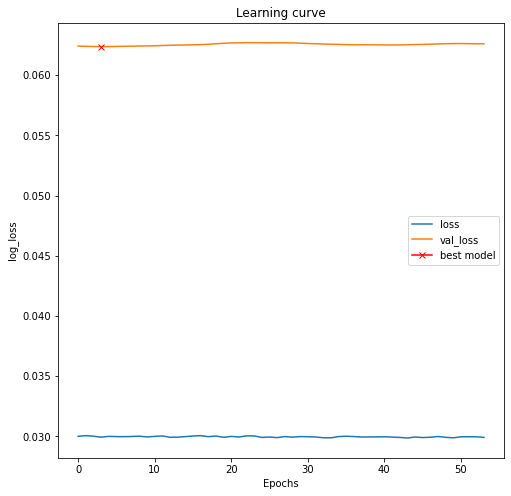

In [206]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [207]:
y_pred = model.predict(X_test)

In [208]:
X_test.shape

(3, 160, 160, 22)

In [209]:
y_pred.shape

(3, 160, 160, 22)

In [210]:
y_test.shape

(3, 160, 160, 22)

In [211]:
y_test[0,0,0]

array([-0.19903737,  0.11794328, -0.24557082, -0.54851068,  0.09910056,
       -0.28768578,  0.02161282,  0.29264464, -0.20378099,  0.51545351,
        0.54952011,  0.0807605 , -0.12984427,  0.31793624, -0.02537075,
       -0.29820646, -0.4551867 ,  0.24079032, -0.24153012, -0.19589598,
       -0.41141442,  0.31475947])

In [212]:
y_pred[0,0,0]

array([-0.18584645,  0.11126582, -0.15644872, -0.23019624,  0.06372911,
       -0.00669005, -0.03452036,  0.1353563 ,  0.00035829,  0.15605855,
        0.22680397, -0.14442852, -0.10806216,  0.22026551, -0.0875077 ,
       -0.17380323, -0.13008595,  0.00053675, -0.13583946, -0.00948873,
       -0.10060748,  0.2246458 ], dtype=float32)

In [ ]:
y_test = y_test.T

In [ ]:
y_pred = y_pred.T

In [ ]:
y_pred.shape

In [ ]:
print("y_test : \n", y_test[0,0,1])
print("=====================================")
print("y_pred : \n", y_pred[0,0,1])

In [ ]:
axe = plt.axes()
plt.rcParams.update({'font.size':15})
plt.style.use('seaborn-whitegrid')
plt.scatter(y_test[:,0], y_pred[:,0], s=1)
plt.title('Coefficients')
axe.set(xlabel="y_test", ylabel="y_pred")
plt.show()
# plt.scatter(X_test, y_test, label="Données d'évaluation", color="b")